In [1]:
'''
다 함께 하는 작업 공간이기 때문에 경로나 파일 명 등을 통일 해야 할 것 같습니다.
그렇게 하지 않으면 경로 때문에 매번 새로운 커밋이 생성 됩니다.
'''

import os

# 현재 작업 디렉토리 확인
current_directory = os.getcwd()
print("Current directory:", current_directory)

# 필요한 CSV 파일이 있는 디렉토리로 변경
target_directory = "C:/k-project/raw_datasets/회귀" # 해당 코드 부분의 경로를 동일하게 하거나 / 깃 리파지토리 안에 파일을 집어 넣는 작업 필요.      
os.chdir(target_directory)

import pandas as pd

# CSV 파일 불러오기
csv_filename = "국가별_총에너지_발전량(1980-2021)_회귀_시각화_전처리.csv"  # CSV 파일명. 파일명을 모두 동일하게 해야합니다.
df = pd.read_csv(csv_filename)

# 데이터 확인
print(df.head())


Current directory: c:\k-project\source\발전량
   Unnamed: 0 COUNTRY                      GENERATION  Year        Value
0           0   World        Generation (billion kWh)  1980  8017.590351
1           1   World           Nuclear (billion kWh)  1980   684.380219
2           2   World      Fossil fuels (billion kWh)  1980  5588.874065
3           3   World        Renewables (billion kWh)  1980  1754.115066
4           4   World  Hydroelectricity (billion kWh)  1980   1722.56809


In [2]:
pd.set_option('display.max_rows', None)  # 최대 행 수를 None으로 설정
pd.set_option('display.max_columns', None)  # 최대 열 수를 None으로 설정

In [3]:
pd.set_option('display.max_rows', 15)  # 최대 행 수를 None으로 설정
pd.set_option('display.max_columns', 15)  # 최대 열 수를 None으로 설정

### 국가별 에너지 발전량

COLUMN NAME 설명  
COUNTRY : 국가명  
CONSUMPTION : 발전 방식  
YEAR : 년도  
VALUE : 에너지 발전량  

In [4]:
df.head()
# 앗 첫번째 열에 인덱스가 포함되어 데이터 프레임이 불러와졌다! 제거하자

,Unnamed: 0,COUNTRY,GENERATION,Year,Value
0,0,World,Generation (billion kWh),1980,8017.590351
1,1,World,Nuclear (billion kWh),1980,684.380219
2,2,World,Fossil fuels (billion kWh),1980,5588.874065
3,3,World,Renewables (billion kWh),1980,1754.115066
4,4,World,Hydroelectricity (billion kWh),1980,1722.56809


In [5]:
df.tail()

,Unnamed: 0,COUNTRY,GENERATION,Year,Value
125575,125575,Zimbabwe,Tide and wave (billion kWh),2021,0
125576,125576,Zimbabwe,Solar (billion kWh),2021,0.04148
125577,125577,Zimbabwe,Wind (billion kWh),2021,0
125578,125578,Zimbabwe,Biomass and waste (billion kWh),2021,0.099788966
125579,125579,Zimbabwe,Hydroelectric pumped storage (billion kWh),2021,0


In [6]:
# 필요 없는 열 제거
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [7]:
df.describe()

,Year
count,125580.000000
mean,2000.500000
std,12.120967
min,1980.000000
25%,1990.000000
50%,2000.500000
75%,2011.000000
max,2021.000000


In [8]:
df.info()
# 전체 행은 125580, Value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125580 entries, 0 to 125579
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   COUNTRY     125580 non-null  object
 1   GENERATION  125580 non-null  object
 2   Year        125580 non-null  int64 
 3   Value       123363 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.8+ MB


In [9]:
# 결측값의 개수 확인
df["Value"].isnull().sum()

2217

In [10]:
# Value 데이터 확인
df["Value"].value_counts()

Value
0              64738
--              8226
0.001            930
0.002            786
0.003            522
               ...  
20.69222           1
16.04              1
39.52822           1
11.894             1
0.099788966        1
Name: count, Length: 23325, dtype: int64

In [11]:
# 각 행이 숫자형인지 판별하는 함수 정의
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

# 각 행이 문자형인지 판별하는 함수 정의
def is_string(s):
    if isinstance(s, str):
        # 이미 숫자로 변환 가능한 경우는 제외한다.
        return not is_number(s)
    else:
        return False

# 각 행이 결측값인지 판별하는 함수 정의
def is_nan(s):
    return pd.isnull(s)

# 각각의 조건에 따라 boolean mask 생성 후 sum()을 이용해 개수 계산 
num_count = df['Value'].apply(is_number).sum()
str_count = df['Value'].apply(is_string).sum()
nan_count = df['Value'].apply(is_nan).sum()


print(f"Number Count: {num_count}")
print(f"String Count: {str_count}")
print(f"NaN Count: {nan_count}")

Number Count: 116987
String Count: 8593
NaN Count: 2217


In [12]:
# 문자열로 구성된 Value의 값 중 범주 및 개수 확인
str_df = df[df['Value'].apply(is_string)]

print(str_df['Value'].value_counts())

Value
--    8226
ie     367
Name: count, dtype: int64


In [13]:
nan_df = df[df['Value'].apply(is_nan)]

print(nan_df)

                 COUNTRY                                  GENERATION  Year  \
1729          Micronesia                    Generation (billion kWh)  1980   
1730          Micronesia                       Nuclear (billion kWh)  1980   
1731          Micronesia                  Fossil fuels (billion kWh)  1980   
1732          Micronesia                    Renewables (billion kWh)  1980   
1733          Micronesia              Hydroelectricity (billion kWh)  1980   
...                  ...                                         ...   ...   
125367  U.S. Territories                 Tide and wave (billion kWh)  2021   
125368  U.S. Territories                         Solar (billion kWh)  2021   
125369  U.S. Territories                          Wind (billion kWh)  2021   
125370  U.S. Territories             Biomass and waste (billion kWh)  2021   
125371  U.S. Territories  Hydroelectric pumped storage (billion kWh)  2021   

       Value  
1729     NaN  
1730     NaN  
1731     NaN  
173

데이터 셋의 value 열의 데이터타입은 object이다.  
분석을 위해서 전처리를 시작해보자  
value 열의 문자열은 '--','ie'로 구성되어있으며 각 8226, 367개 있는데 먼저 어떤 의미인지 확인해봐야겠지.

Footnotes  
-- = Not applicable

\- = No data reported

(s) = Value is too small for the number of decimal places shown

NA = Not available

W = Data withheld to avoid disclosure

ie = Data are included elsewhere for this time period

\* = Conversion Factor Unavailable

se = EIA estimates based on time series analysis

st = EIA forecasts (Short-Term Energy Outlook)

Gross domestic product and energy intensity are expressed in Year 2015 U.S. Dollar at Purchasing Power Parities.

The Monthly Energy Review no longer contains a separate international section. All historical data starting in 1973 that were formerly presented in MER Section 11 are now available on the International Energy Statistics browser above.

'--'는 해당없음  
'ie'는 이 기간의 데이터는 다른 곳에 포함됩니다.

즉 '--'는 발전하지 않아 발전량 데이터에 해당이 없는 것으로 보여지며(ex. 환경적 여건, 경제적 여건 등)  
    따라서 '--'는 제거하여 발전(전력 생산)하는 국가에 초점을 두는 것이 타당할 것으로 보여짐  
'ie'는 다른 값으로 대체할 경우 중복의 여지가 있어 제거하는 것이 타당할 것으로 보여짐

In [14]:
# '--' 값을 None으로 바꾸기
df['Value'] = df['Value'].replace('--', None)

In [15]:
# 'ie' 값을 None으로 바꾸기
df['Value'] = df['Value'].replace('ie', None)

In [16]:
# 분석을 위하여 Value의 Data type을 Object -> float64로 변경하기
df['Value']= df['Value'].astype(dtype='float64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125580 entries, 0 to 125579
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   COUNTRY     125580 non-null  object 
 1   GENERATION  125580 non-null  object 
 2   Year        125580 non-null  int64  
 3   Value       114770 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


데이터 시각화

In [18]:
# 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: xlabel='COUNTRY', ylabel='Value'>

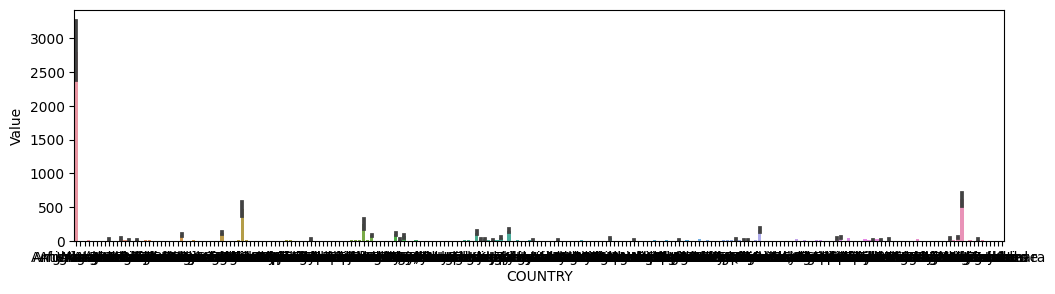

In [19]:
# 국가별 총 발전량
plt.figure(figsize=(12,3))
sns.barplot(data=df,x="COUNTRY",y="Value",)


In [ ]:
# 연도별 총 발전량

In [ ]:
# 발전원별 발전량